# Principal Component Analysis on MNIST Dataset

According to Nicholson from his article on [A.I. Wiki - A Beginner's Guide to Important Topics in AI, Machine Learning and Deep Learning](https://wiki.pathmind.com/mnist "Pathmind"), MNIST is a subset of a larger dataset available at the National Institute of Standards and Technology. The acronym stands for Modified National Institute of Standards and Technology. It is a dataset of labeled pair of handwritten 0 to 9 digits. All of its images are grey, same sized, centered, and normalized in 28x28 pixels. This database is commonly used for training various processing systems.

In machine learning, **Dimensionality Reduction** is the most common task in Unsupervised Learning. High dimensionality makes data analysis Principal Component Analysis (PCA) uses Singular Value Decomposition (SVD) to lower the dimensional space of data. Although the MNIST dataset is commonly used for Supervised Learning to train classifiers due to its labeled dataset pairs, we will try to understand the underlying structure of the images without their labels.

In [2]:
# Load MNIST dataset
from sklearn.datasets import fetch_openml
import numpy as np

# Load the dataset
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

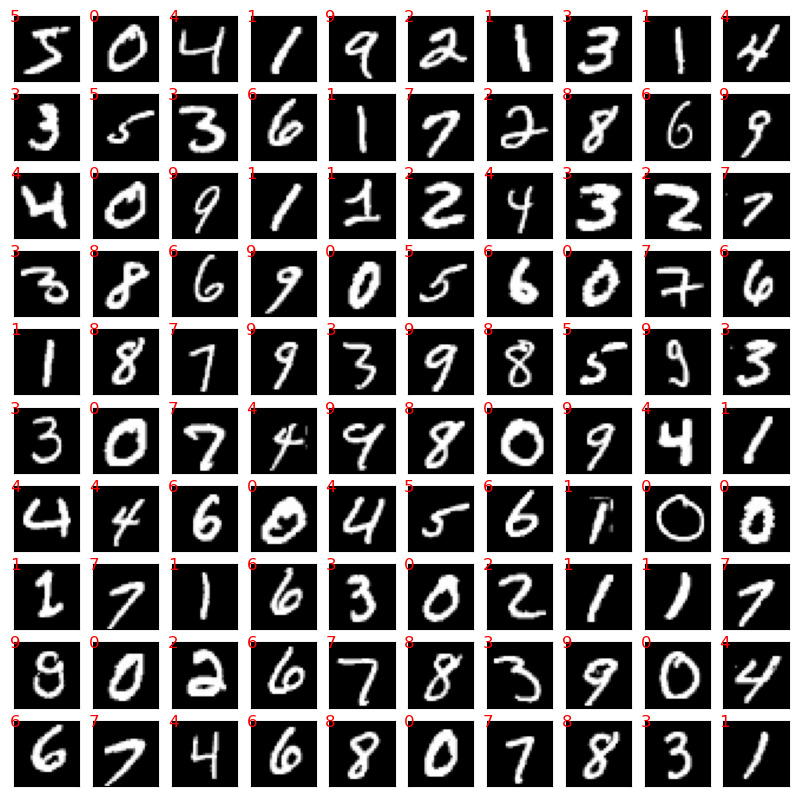

In [3]:
# Display each digit with labels
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap=cm.Greys_r)
    ax.text(0, 0, str(y_train[i]), color='red', fontsize=12, ha='center', va='center')
plt.show()

**PCA** identifies the axis that accounts for the largets amount of variance in the training set (first PC). It also finds the second axis that accounts for the largest amount of the remaining variance (second PC).

The **Explained Variance Ratio** in the training data of this dataset shows that 9% of the dataset's variance lies along the first principal component and 7% lies along the second principal component.

In [9]:
# Use PCA to retrieve the first and second principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Output explained variance ratio
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.09704664 0.07095924]


<Figure size 800x600 with 0 Axes>

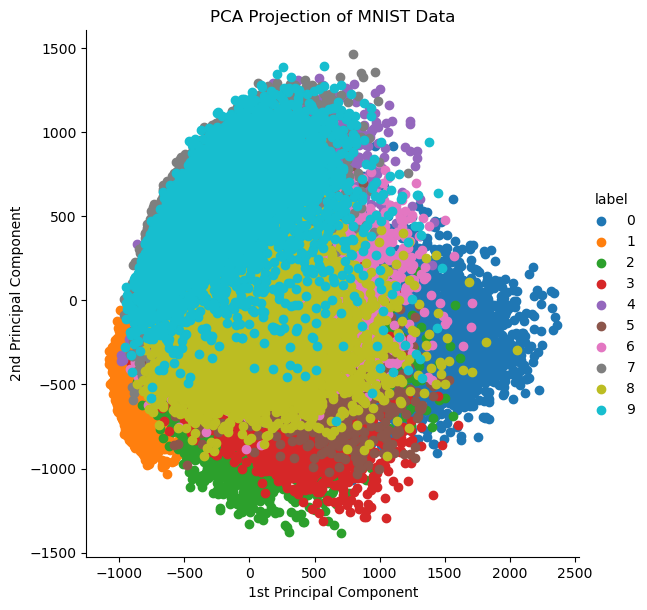

In [10]:
# Plot projections on a 1D hyperplane

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Combine the PCA-transformed data with the labels
pca_data = np.vstack((X_train_pca.T, y_train)).T

# Create a DataFrame with the combined data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

# Ensure the labels are sorted from 0 to 9
pca_df['label'] = pca_df['label'].astype(int)
pca_df = pca_df.sort_values(by='label')

# Create the scatter plot using seaborn's FacetGrid
plt.figure(figsize=(8, 6))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('PCA Projection of MNIST Data')
plt.show()

Here, **Incremental PCA** is used to split the training set into mini-batches and feed an Incremental PCA algorithm one mini-batch at a time. To reduce the dimensionality of the MNIST dataset down to 154 dimensions, the code below splits MNIST dataset into 100 mini-batches and feeds them to Scikit-Learn's IncrementalPCA class. 

**partial_fit()** is called with each mini-batch instead of fit() that is used for the whole training set. 

Next, X_train_reduced is reconstructed to pre-image data to be compared to the original image data

In [15]:
# Use incremental PCA to reduce dimensionality to 154 dimensions
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_train_reduced = inc_pca.transform(X_train)

# Reconstruct pre-image data
X_train_recovered = inc_pca.inverse_transform(X_train_reduced)

Comparison between original and compressed images shows that the dimensions are reduced evident by the clarity of the image.  Compressed images seems more blurry compared to the original ones. At the same time, the digits are still recognizable proving that after PCA, the important features are retained even after dimensionality is decreased.

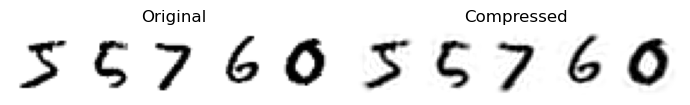

In [14]:
# Display the original and compressed digits from X_recovered
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2000], X_train_recovered[::2000])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for col in range(5):
        plt.imshow(X[col].reshape(28, 28), cmap="binary",
                   vmin=0, vmax=255, extent=(col, col + 1, 0, 1))
        plt.axis([0, 5, 0, 1])
        plt.axis("off")
plt.tight_layout()
plt.show()
